In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib as mpl 
import matplotlib
import matplotlib.pyplot as plt
import squarify
from matplotlib.pyplot import figure
import datetime
from datetime import datetime
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import csv
import importlib
import seaborn as sns
import json
from tqdm.notebook import tqdm
import sys
sys.path.append('C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/notebook/tweet_utils')
import tweets_utils
%autosave 3600

Autosaving every 3600 seconds


# Motivazioni
<p>
    
    Le motivazioni per la scelta di questi 12 nuovi utenti si basa su uno studio analogo a quanto fatto per i dozen dalla CCDH.
    
    Dal momento che non viene specificato di quale tipo di attività sono responsabili (tweet/retweet generati) si è scelto di estrarre le gli utenti che fanno "good information" e sono attivi sia tra i retweettati che post originali
    https://www.ucl.ac.uk/oppenheim/Covid-19_tweeps.shtml
</p>

# Indice  
### Comparison Dozen and High credibility verified user
   - [Stats](#c_stats)
   - [Original](#original)
   - [Quote](#quote)
   - [Retweetted users](#rt)
   - [Most shared tweets](#mst)
   - [Link shared](#link_sh)
   - [Youtube Domain Shared](#yt)
       - [Bad](#bad_yt)
       - [Good](#good_yt)
       - [SAGE on YouTube](#sage_yt)
   - [Facebook](#fb)
   - [Comparison hashtag](#comp_hashtag)
   
   <br>
   
   - [Dozen Followers](#follow)
   - [Link shared](#dm)
   - [Comparison hashtag](#hs)
      - [Youtube Domain Shared](#yt)
       - [Bad](#bad_yt)
       - [Good](#good_yt)
       - [SAGE on YouTube](#sage_yt)
   - [Hashtag - SAGE](#hs_sa)
   - [Credibility comparison](#cred_comp)
   - [Novax Score](#nova)
   
   <br>
   
   - [Interaction check](#interaction)
   - [Reply investigation](#reply_inv)
   - [File Botometer](#bom)
   - [Regression: Degree - Score](#degscore)
   - [SAGE](#sage)
   - [Avaxtar](#avaxtar)

In [125]:
sources = list(bad_rt_in[bad_rt_in["rt_user_screen_name"].isin(list(bad_dozen_list["screen_name"]))]["user_screen_name"])
destinations = list(bad_rt_in[bad_rt_in["rt_user_screen_name"].isin(list(bad_dozen_list["screen_name"]))]["rt_user_screen_name"])
df_to_csv = pd.DataFrame(list(zip(sources, destinations)), columns=["source", "destination"])
df_to_csv.to_csv("C:/Users/gianl/Desktop/Gi/Supsi/new_rt_bad.csv", index=False, encoding="utf-8", line_terminator="\n")

In [126]:
df_to_csv

,source,destination
0,limejuice1004,mercola
1,1minutetomidnit,mercola
2,i_aftabahmad,mercola
3,shomoyogu,mercola
4,jeffreymadwisc,mercola
...,...,...
771741,CalderwoodNeal,RobertKennedyJr
771742,JavierAstari,RobertKennedyJr
771743,Dakoda_1022,RobertKennedyJr
771744,chazzaa88,RobertKennedyJr


In [2]:
path_url = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/urls/expanded_urls_*.csv")
expanded_urls = pd.DataFrame()
for i in path_url:
    expanded_urls = expanded_urls.append(pd.read_csv(i, low_memory=False, lineterminator="\n"))
    expanded_urls = expanded_urls[expanded_urls["expanded"].notna()]
    expanded_urls.drop('error', inplace=True, axis=1)
    expanded_urls.drop_duplicates(subset=['url'])
expanded_urls.reset_index(drop=True)
expanded_urls

,url,expanded
0,https://bit.ly/38SLstI,https://news.abs-cbn.com/news/01/29/20/cbcp-is...
1,http://dlvr.it/RP1y3X,https://www.theglobeandmail.com/world/article-...
2,https://trib.al/aYQ7ZIA,https://www.dailymail.co.uk/news/article-79390...
3,http://bit.ly/2tMEBmu,https://www.who.int/news-room/q-a-detail/q-a-c...
4,http://bit.ly/36HK7Vk,https://cnnphilippines.com/news/2020/1/31/pers...
...,...,...
49806,https://www.irishtimes.com/news/social-affairs...,https://www.irishtimes.com/news/social-affairs...
49807,https://www.irishtimes.com/news/social-affairs...,https://www.irishtimes.com/news/social-affairs...
49808,https://www.irishtimes.com/news/social-affairs...,https://www.irishtimes.com/news/social-affairs...
49809,https://www.irishtimes.com/news/social-affairs...,https://www.irishtimes.com/news/social-affairs...


In [3]:
cols = ["id", "id_str", "user_id", "user_screen_name", "text","in_reply_to_status_id",
        "in_reply_to_status_id_str" ,"in_reply_to_user_id" ,"in_reply_to_user_id_str" ,"in_reply_to_screen_name",
        "rt_created_at", "rt_in_reply_to_status_id", "rt_in_reply_to_user_id", "rt_id", "rt_user_id", "rt_created_at",
        "rt_user_screen_name", "quoted_status_id" ,"quoted_status_text" ,"quoted_status_created_at", "quoted_user_id",
        "quoted_user_created_at", "hashtags", "user_mentions", "urls", "retweet_count", "created_at"]

In [4]:
# scores and credibility
path =  glob.glob("F:/Supsi/COVID-19-Tweets/large_files/urls/")
scores = pd.read_csv(path[0] + "sum_of_urls_df_all_months_with_score.csv", low_memory=False, lineterminator="\n")
scores = scores[scores["conspiracy_score"].notna()]
scores = scores[scores["number_of_urls"]>=10]
scores = scores.reset_index(drop=True)

path_csv = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/")
credibility_url = pd.read_csv(path_csv[0] + "domain_credibility.csv")
bad_dozen_list = pd.read_csv(path_csv[0] + "disinformation_users.csv")
good_dozen_list = pd.read_csv(path_csv[0] + "good_dozen.csv")
good_users_list = pd.read_csv(path_csv[0] + "all_good_users.csv", low_memory=False, lineterminator="\n")
bad_fbme = pd.read_csv(path_csv[0] + "bad_fbme_decompress.csv", lineterminator="\n")

path_ccdh =  glob.glob("F:/Supsi/COVID-19-Tweets/large_files/ccdh/")
df_good_users_interactions = pd.read_csv(path_ccdh[0] + "all_good.csv", low_memory=False, lineterminator="\n")
df_bad_dozen_interactions = pd.read_csv(path_ccdh[0] + "bad_dozen.csv", low_memory=False, lineterminator="\n")

df_bad_activity = df_bad_dozen_interactions[df_bad_dozen_interactions["user_screen_name"].isin(list(bad_dozen_list["screen_name"]))]
df_good_activity = df_good_users_interactions[df_good_users_interactions["user_screen_name"].isin(list(good_users_list["screen_name"]))]

### Reminder:

<p> 

    df_good/bad_activity → DataFrame che contiene le attività attive delle due categorie (in cui sono loro ad effettuare qualcosa)

    df_bad/good_dozen_interactions → interazioni attive e passive (ma mancano i retweet grossi)
    
</p>

In [6]:
df_bad_split = tweets_utils.split_df(df_bad_activity)
df_good_split = tweets_utils.split_df(df_good_activity)

In [7]:
# name = list(df_good_activity["user_screen_name"])
# # link = list(df_good_activity["urls"])
# hashtag = list(df_good_activity["hashtags"])
good_rt_in = pd.DataFrame()
for chunk in tqdm(pd.read_csv(path_ccdh[0] + "good_dozen_rt.csv", lineterminator='\n', 
                         low_memory=False, usecols=cols, chunksize=int(1e6))):
    good_rt_in = good_rt_in.append(chunk)
    
bad_rt_in = pd.DataFrame()
for chunk in tqdm(pd.read_csv(path_ccdh[0] + "bad_dozen_rt_ricevuti.csv", lineterminator='\n', 
                         low_memory=False, usecols=cols, chunksize=int(1e6))):
    bad_rt_in = bad_rt_in.append(chunk)
    
#     link.extend(list(chunk["urls"]))
#      hashtag.extend(list(chunk["hashtags"]))
#     name.extend(list(chunk["user_screen_name"]))

In [62]:
# bad = bad_rt_in[bad_rt_in["rt_user_screen_name"].isin(list(bad_dozen_list["screen_name"]))]
# good = good_rt_in[good_rt_in["rt_user_screen_name"].isin(list(good_dozen_list["screen_name"]))]

# s = pd.Series(bad["rt_id"]).value_counts().sort_values(ascending=False)
# s_ = pd.Series(good["rt_id"]).value_counts().sort_values(ascending=False)

# vals = list(s.values)
# s = pd.Series(vals).value_counts().sort_values(ascending=False)
# values = list(s.index)
# corr = list(s.values)
# df_distrib = pd.DataFrame(list(zip(values, corr)), columns=["rt_value", "occurrency"])
# df_distrib["dozen"] = "bad"
# vals = list(s_.values)
# s = pd.Series(vals).value_counts().sort_values(ascending=False)
# values = list(s.index)
# corr = list(s.values)
# df_distrib_ = pd.DataFrame(list(zip(values, corr)), columns=["rt_value", "occurrency"])
# df_distrib_["dozen"] = "good"
# df_distrib = df_distrib.append(df_distrib_)

# fig = px.histogram(df_distrib, x="rt_value", y="occurrency", color="dozen")
# fig.show()

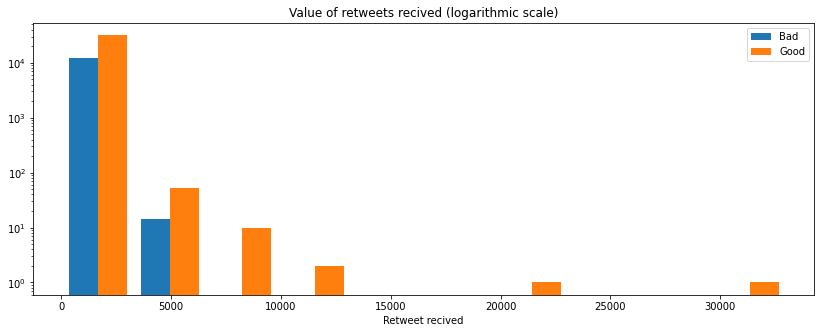

In [79]:
s = pd.Series(bad["rt_id"]).value_counts().sort_values(ascending=False)
s_ = pd.Series(good["rt_id"]).value_counts().sort_values(ascending=False)
vals_ = list(s_.values)
vals = list(s.values)
df_1 = pd.DataFrame(vals, columns=["rt_value"])
df_2 = pd.DataFrame(vals_, columns=["rt_value"])
plt.hist([df_1["rt_value"], df_2["rt_value"]], label=['Bad', 'Good'])
plt.legend(loc='upper right')
plt.title("Value of retweets recived (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Retweet recived")
plt.rcParams["figure.figsize"] = (14,5)
plt.show()

Number of total tweets: 19159
Number of original tweets: 13182
Number of retweets: 2834
Number of replies: 1622
Number of quotes: 1521
Number of original_tweets: 68.8% of total tweets
Number of retweets: 14.79% of total tweets
Number of replies: 8.47% of total tweets
Number of quotes: 7.94% of total tweets
Check sum == len(tweets):  True


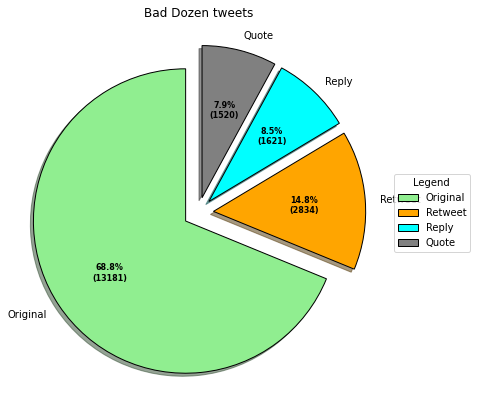

In [70]:
original_bad = df_bad_split["original"]
quote_bad = df_bad_split["quote"]
retweet_bad = df_bad_split["retweet"]
reply_bad = df_bad_split["reply"]
mentions_bad = df_bad_split["original_mention"]
reply_status_bad = df_bad_split['reply_to_status']
retweet_original_bad = df_bad_split['rt_original']
retweet_reply_bad = df_bad_split['rt_in_reply']
retweet_mention_bad = df_bad_split['rt_mention']
quote_original_bad = df_bad_split['quote_original']
quote_reply_bad = df_bad_split['quote_reply']
quote_mention_bad = df_bad_split['quote_mention']
total_len_bad = len(df_bad_activity) 
len_quote_bad = len(quote_bad)
len_original_bad = len(original_bad)
len_rt_bad = len(retweet_bad)
len_rp_bad = len(reply_bad)
len_mentions_bad = len(mentions_bad)
len_reply_status_bad = len(reply_status_bad)
len_retweet_original_bad = len(retweet_original_bad)
len_retweet_reply_bad = len(retweet_reply_bad)
len_retweet_mention_bad = len(retweet_mention_bad)
len_quote_original_bad = len(quote_original_bad)
len_quote_reply_bad = len(quote_reply_bad)
len_quote_mention_bad = len(quote_mention_bad)
tweets_utils.stats(total_len_bad, len_original_bad, len_rt_bad, len_rp_bad, len_quote_bad)
tweets_utils.print_pie_chart4("Bad Dozen tweets", "Original", "Retweet", "Reply", "Quote", len_original_bad, len_rt_bad, len_rp_bad, len_quote_bad)

Number of total tweets: 750820
Number of original tweets: 146304
Number of retweets: 287203
Number of replies: 233374
Number of quotes: 83939
Number of original_tweets: 19.49% of total tweets
Number of retweets: 38.25% of total tweets
Number of replies: 31.08% of total tweets
Number of quotes: 11.18% of total tweets
Check sum == len(tweets):  True


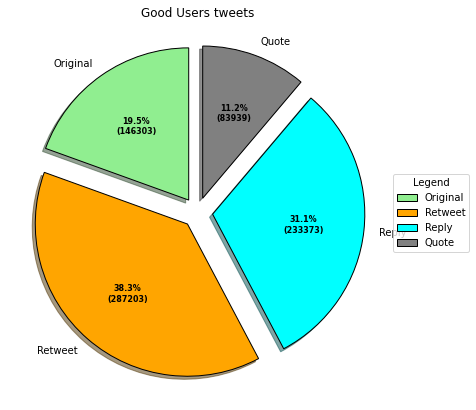

In [71]:
original_good = df_good_split["original"]
quote_good = df_good_split["quote"]
retweet_good = df_good_split["retweet"]
reply_good = df_good_split["reply"]
mentions_good = df_good_split["original_mention"]
reply_status_good = df_good_split['reply_to_status']
retweet_original_good = df_good_split['rt_original']
retweet_reply_good = df_good_split['rt_in_reply']
retweet_mention_good = df_good_split['rt_mention']
quote_original_good = df_good_split['quote_original']
quote_reply_good = df_good_split['quote_reply']
quote_mention_good = df_good_split['quote_mention']
total_len_good = len(df_good_activity) 
len_quote_good = len(quote_good)
len_original_good = len(original_good)
len_rt_good = len(retweet_good)
len_rp_good = len(reply_good)
len_mentions_good = len(mentions_good)
len_reply_status_good = len(reply_status_good)
len_retweet_original_good = len(retweet_original_good)
len_retweet_reply_good = len(retweet_reply_good)
len_retweet_mention_good = len(retweet_mention_good)
len_quote_original_good = len(quote_original_good)
len_quote_reply_good = len(quote_reply_good)
len_quote_mention_good = len(quote_mention_good)
tweets_utils.stats(total_len_good, len_original_good, len_rt_good, len_rp_good, len_quote_good)
tweets_utils.print_pie_chart4("Good Users tweets", "Original", "Retweet", "Reply", "Quote", len_original_good, len_rt_good, len_rp_good, len_quote_good)

# Stats
<a id="c_stats"/>

In [72]:
bad_values = [(len_original_bad/total_len_bad), (len_rt_bad/total_len_bad), (len_rp_bad/total_len_bad), (len_quote_bad/total_len_bad)]
good_values = [len_original_good/total_len_good, len_rt_good/total_len_good, len_rp_good/total_len_good, len_quote_good/total_len_good]
labels = ["Original", "Retweet", "Reply", "Quote"]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=bad_values, x=labels, name="Bad"))
fig.add_trace(go.Histogram(histfunc="sum", y=good_values, x=labels, name="Good"))
fig.update_layout(
    title="Differences between Bad Dozen and Good Users activity",
    xaxis_title="Kind of activity",
    yaxis_title="Percentage of activity",
    legend_title="Legend")
fig.show()


# Original
<a id="original"/>

In [10]:
diff = len_original_bad - len_mentions_bad
bad_values = [(diff/len_original_bad), (len_mentions_bad/len_original_bad)]
diff = len_original_good - len_mentions_good
good_values = [(diff/len_original_good), (len_mentions_good/len_original_good)]
labels = ["Original posts", "Original with mentsions"]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=bad_values, x=labels, name="Bad"))
fig.add_trace(go.Histogram(histfunc="sum", y=good_values, x=labels, name="Good"))
fig.update_layout(
    title="Differences between Bad Dozen and Good Users activity in original posts",
    xaxis_title="Kind of original posts",
    yaxis_title="Percentage of activity",
    legend_title="Legend")
fig.show()


# Quote
<a id="quote"/>

In [11]:
bad_values = [(len_quote_original_bad/len_quote_bad), (len_quote_reply_bad/len_quote_bad), (len_quote_mention_bad/len_quote_bad)]
good_values = [(len_quote_original_good/len_quote_good), (len_quote_reply_good/len_quote_good), (len_quote_mention_good/len_quote_good)]
labels = ["Quotes to originals", "Quotes to replies", "Quotes to mentions",]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=bad_values, x=labels, name="Bad"))
fig.add_trace(go.Histogram(histfunc="sum", y=good_values, x=labels, name="Good"))
fig.update_layout(
    title="Differences between Bad Dozen and Good Users activity in Quotes",
    xaxis_title="Kind of Quote",
    yaxis_title="Percentage of activity",
    legend_title="Legend")
fig.show()


# Retweet
<a id="rt"/>

In [12]:
# val = pd.Series(df_bad_dozen_interactions["rt_user_screen_name"])
# val = val.value_counts().sort_values(ascending=False)
# fig = plt.figure(figsize=(14, 8))
# ax = val[:10].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
# ax.set_title('Top 10 RETWEETED BAD DOZEN', fontsize=15)
# ax.invert_yaxis()
# plt.show()

# val = pd.Series(df_good_users_interactions["rt_user_screen_name"])
# val = val.value_counts().sort_values(ascending=False)
# fig = plt.figure(figsize=(14, 8))
# ax = val[:10].plot(kind='barh', color='green', fig=(14,14)) #green #steelblue
# ax.set_title('Top 10 RETWEETED GOOD DOZEN', fontsize=15)
# ax.invert_yaxis()
# plt.show()

In [13]:
bad_values = [(len_retweet_original_bad/len_rt_bad), (len_retweet_reply_bad/len_rt_bad), (len_retweet_mention_bad/len_rt_bad)]
good_values = [(len_retweet_original_good/len_rt_good), (len_retweet_reply_good/len_rt_good), (len_retweet_mention_good/len_rt_good)]
labels = ["Retweet of original", "Retweet of reply", "Retweet of mention",]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=bad_values, x=labels, name="Bad"))
fig.add_trace(go.Histogram(histfunc="sum", y=good_values, x=labels, name="Good"))
fig.update_layout(
    title="Differences between Bad Dozen and Good Users activity in Retweet",
    xaxis_title="Kind of Retweet",
    yaxis_title="Percentage of activity",
    legend_title="Legend")
fig.show()


# Most Shared Tweets
<a id="mst"/>

In [95]:
# original_bad_most_shared = original_bad[original_bad["retweet_count"].notna()].sort_values(by=["retweet_count"], ascending=False)[["id", "retweet_count"]][:2000]
# # original_good_most_shared = original_good[original_good["retweet_count"].notna()].sort_values(by=["retweet_count"], ascending=False)[["id","retweet_count"]]
# original_bad_most_shared["id"] = original_bad_most_shared["id"].astype("str")
# # original_good_most_shared["id"] = original_good_most_shared["id"].astype("str")
# print("a")
# x1 = original_bad_most_shared["id"]
# y1 = original_bad_most_shared["retweet_count"]
# # plotting the line 1 points 
# plt.plot(x1, y1, label = "line 1")
# # line 2 points
# # x2 = original_good_most_shared["id"]
# # y2 = original_good_most_shared["retweet_count"]
# # # plotting the line 2 points 
# # plt.plot(x2, y2, label = "line 2")
# # plt.xlabel('x - axis')
# # plt.ylabel('y - axis')
# # plt.title('Two or more lines on same plot with suitable legends ')
# # plt.legend()
# # Display a figure.
# plt.show()

In [30]:
# original_good[original_good["retweet_count"].notna()].sort_values(by=["retweet_count"], ascending=False)[["id",
#               "created_at", "user_id", "user_screen_name", "text", "retweet_count"]][:15]

# Link shared by Dozen
<a id="link_sh"/>

In [5]:
importlib.reload(tweets_utils)
def substitute_compressed_url(df, flag = False, fbme = None, expanded_urls = expanded_urls):
    df_urls = df.loc[df['urls'] != '[]']
    df_urls = df.loc[df['urls'].notna()]
    urls = df_urls["urls"]
    val = []
    for i in urls:
        if type(i) == float:
            print(i)
        else:
            val.append(i)
    val = [i for i in val if i != "[]"]
    print(len(val))
#     for i in val:
#         print(i)
#         print(type(i))
#         print(i.split()[3])
    val = [x.split()[3].translate({ord("'"): None}).replace(",","") for x in val]
    df_urls = pd.DataFrame(val, columns=["urls"])
    df_merge = df_urls.merge(expanded_urls, how="left", left_on="urls", right_on="url")
    x = df_merge[df_merge["url"].notna()]
    if flag:
        y = df_urls.merge(fbme, left_on="urls", right_on="compressed", how="left")
        y = y[y["compressed"].notna()]
        for index, row in tqdm(y.iterrows()):
            df_urls.loc[df_urls["urls"]==row["compressed"], "urls"] = row["decompressed"]
    print(len(x))
    for index, row in tqdm(x.iterrows()):
        df_urls.loc[df_urls["urls"]==row["url"], "urls"] = row["expanded"]
    print("Beautify...")
    urls = df_urls["urls"]
    urls = [tweets_utils.url_decompress(v) for v in urls]
    urls = tweets_utils.remove_www(urls)
    return urls

In [6]:
df_good_activity_urls = substitute_compressed_url(df_good_activity)
df_bad_activity_urls = substitute_compressed_url(df_bad_activity, True, bad_fbme)

363043
508



Beautify...
['Https:', 'www.bangkokpost.com/thailand/general/1850319/korean-woman-caught-virus-in-thailand']
invalid data
['Https:', 'www.wsj.com/articles/how-you-can-donate-protective-equipment-to-help-hospitals-fight-coronavirus-11585323638?reflink=share_mobilewebshare']
invalid data
['Https:', 'insidemedicine.bulletin.com/subscribe']
invalid data
['Https:', 'insidemedicine.bulletin.com/']
invalid data
['Https:', 'insidemedicine.bulletin.com/subscribe']
invalid data
['Https:', 'insidemedicine.bulletin.com/subscribe']
invalid data
['Http:', 'theconversation.com/what-changes-in-temperature-mean-for-africas-tsetse-fly-125663']
invalid data
['Http:', 'bit.ly/publichealthoncall']
invalid data
['None']
invalid data
14890



8



Beautify...
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data
['not found']
invalid data


In [45]:
# print(len(df_good_urls)/len(good_dozen_list["screen_name"]))
# print(len(df_bad_urls)/len(bad_dozen_list["screen_name"]))
# df_gg = pd.Series(df_good_activity_urls).value_counts().sort_values(ascending=False)
# df_gg[:15]

In [33]:
df_good_urls = pd.DataFrame(df_good_activity_urls, columns =['Url'])
bad_urls = pd.Series(df_bad_activity_urls).value_counts().sort_values(ascending=False)
x = df_good_urls[df_good_urls["Url"].isin(list(bad_urls[1:24].keys()))]
good_urls = pd.Series(x["Url"]).value_counts().sort_values(ascending=False)
ind = []
type_b = []
type_g = []
for i in bad_urls[1:24].keys():
    type_g.append("Good")
    type_b.append("Bad")
    if i in good_urls:
        continue
    else:
        good_urls = good_urls.append(pd.Series(0,index=[i]))
good_urls_values = list(good_urls.values)
good_urls_keys = list(good_urls.keys())
bad_urls_values = list(bad_urls[1:24].values)
bad_urls_keys = list(bad_urls[1:24].keys())
df_plot_good = pd.DataFrame(zip(good_urls_values, good_urls_keys, type_g), columns=["Count", "Url", "Dozen"])
df_plot_bad = pd.DataFrame(zip(bad_urls_values, bad_urls_keys, type_b), columns=["Count", "Url", "Dozen"])
df_plot = df_plot_good.append(df_plot_bad)
df_plot = df_plot.reset_index(drop = True)

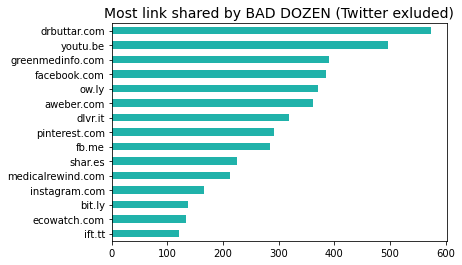

In [34]:
val = pd.Series(df_bad_activity_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[1:16].plot(kind='barh', color='lightseagreen')
ax.set_title('Most link shared by BAD DOZEN (Twitter exluded)', fontsize=14)
ax.invert_yaxis()
plt.show()

In [35]:
val.drop(val.index[0], inplace=True)
val.drop(val.index[4], inplace=True)
val.drop(val.index[5], inplace=True)
val.drop(val.index[7], inplace=True)
val.drop(val.index[9], inplace=True)
yt_val = val[13]
val[3] = val[3] + val[6]
val.drop(val.index[6], inplace=True)
val[1] = val[1] + val[12]
val.drop(val.index[12], inplace=True)
# plt.figure(figsize=(9,7))
# colors = ["#641e16","#78281f","#7b241c","#943126","#922b21",
# "#b03a2e","#a93226","#cb4335","#c0392b","#e74c3c",
#       "#cd6155","#ec7063","#d98880","#f1948a","#e6b0aa",
#           "#f5b7b1", "#f2d7d5","#fadbd8","#f9ebea","#fdedec"]
# cmap = matplotlib.cm.Reds
# mini=min(values)
# maxi=max(values)
# norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
# colors = [cmap(norm(value)) for value in values]
# squarify.plot(sizes=values, alpha=.8, color=colors, label = labels)
# plt.axis('off')
# plt.show()

In [36]:
labels = list(val[:15].keys())
labels[1] = "youtube.com"
values = list(val[:15].values)
dddf = pd.DataFrame(list(zip(labels, values)), 
                    columns=["labels", "values"])
fig = px.treemap(dddf, path=['labels'],values='values', width=800, height=500)
colors = ["#641e16","#78281f","#7b241c","#943126","#922b21",
"#b03a2e","#a93226","#cb4335","#c0392b","#e74c3c",
      "#cd6155","#ec7063","#d98880","#f1948a","#e6b0aa",
          "#f5b7b1", "#f2d7d5","#fadbd8","#f9ebea","#fdedec"]
fig.update_layout(
    font_size=30,
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [88]:
# df_urls = df_bad_activity.loc[df_bad_activity['urls'] != '[]']
# df_urls = [x.split()[3].translate({ord("'"): None}).replace(",","") for x in df_urls["urls"]]
# df_urls = [x if ("https://youtu.be" in x) or ("https://www.youtube.com" in x) else np.nan for x in df_urls]
# df_urls = list(pd.Series(df_urls).dropna())
# # df_urls.value_counts().sort_values(ascending=False)
# importlib.reload(tweets_utils)
# df_urls_yt = tweets_utils.check_availability(df_urls)

In [89]:
# df_urls_yt.to_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/urls_yt.csv",
#                  line_terminator="\n", index=False, encoding="utf-8")

In [14]:
a = ["bit.ly", "shar.es", "ow.ly", "dlvr.it", "ift.tt"]
df_plot = df_plot[~df_plot["Url"].isin(a)]
df_plot


,Count,Url,Dozen
1,3809,nytimes.com,Good
3,1302,nyti.ms,Good
4,625,youtu.be,Good
5,567,youtube.com,Good
6,388,pscp.tv,Good
7,189,instagram.com,Good
10,124,facebook.com,Good
12,23,fb.me,Good
13,3,pinterest.com,Good
14,0,drbuttar.com,Good


In [15]:
val_yt_good = df_plot.loc[4]["Count"] + df_plot.loc[5]["Count"]
value_good = df_plot.loc[24]["Count"] + df_plot.loc[40]["Count"]
value_bad = df_plot.loc[31]["Count"] + df_plot.loc[26]["Count"]
val_fbme = df_plot.loc[10]["Count"] + df_plot.loc[12]["Count"]
df_plot.loc[df_plot.index == 5, 'Count'] = val_yt_good
df_plot.loc[df_plot.index == 40, 'Count'] = value_good
df_plot.loc[df_plot.index == 26, 'Count'] = value_bad
df_plot.loc[df_plot.index == 10, 'Count'] = val_fbme
df_plot = df_plot.drop(index=4)
df_plot = df_plot.drop(index=12)
df_plot = df_plot.drop(index=24)
df_plot = df_plot.drop(index=31)
df_plot

,Count,Url,Dozen
1,3809,nytimes.com,Good
3,1302,nyti.ms,Good
5,1192,youtube.com,Good
6,388,pscp.tv,Good
7,189,instagram.com,Good
10,147,facebook.com,Good
13,3,pinterest.com,Good
14,0,drbuttar.com,Good
15,0,greenmedinfo.com,Good
16,0,aweber.com,Good


In [16]:
df_f = df_plot[:15].append(df_plot[16:31])
len(df_f)

30

In [17]:
df_f = df_f.sort_values(["Dozen", "Count"])
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
df_f["classifica"] = lst
df_f = df_f.sort_values("classifica", ascending=False)
df_f

,Count,Url,Dozen,classifica
26,669,facebook.com,Bad,15
40,574,youtube.com,Bad,14
23,573,drbuttar.com,Bad,13
25,390,greenmedinfo.com,Bad,12
28,361,aweber.com,Bad,11
30,291,pinterest.com,Bad,10
33,213,medicalrewind.com,Bad,9
34,165,instagram.com,Bad,8
36,133,ecowatch.com,Bad,7
39,96,pscp.tv,Bad,6


In [18]:
fig = px.bar(df_f, color_discrete_sequence=['red', "blue"], x="Count", y="Url", color="Dozen",
             barmode='group', title="Top 15 Bad Dozen domain shared (with comparison)")
fig.update_layout(
    font_size = 15,
    yaxis = dict(autorange="reversed")
)
fig.show()

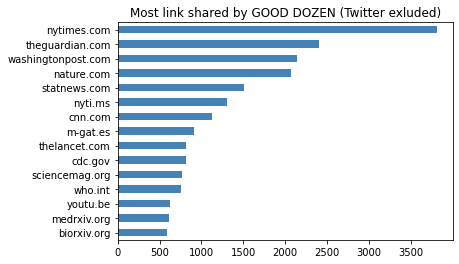

In [19]:
val = pd.Series(df_good_activity_urls).value_counts().sort_values(ascending=False)
val.drop(val.index[0], inplace=True)
val.drop(val.index[0], inplace=True)
val.drop(val.index[1], inplace=True)
val.drop(val.index[4], inplace=True)
val.drop(val.index[12], inplace=True)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='steelblue')
ax.set_title('Most link shared by GOOD DOZEN (Twitter exluded)')
ax.invert_yaxis()
plt.show()

In [20]:
df_bad_urls = pd.DataFrame(df_bad_activity_urls, columns =['Url'])
good_url = pd.Series(df_good_activity_urls).value_counts().sort_values(ascending=False)
x = df_bad_urls[df_bad_urls["Url"].isin(list(good_url[1:20].keys()))]
bad_url = pd.Series(x["Url"]).value_counts().sort_values(ascending=False)
ind = []
type_b = []
type_g = []
for i in good_url[1:20].keys():
    type_g.append("Good")
    type_b.append("Bad")
    if i in bad_url:
        continue
    else:
        bad_url = bad_url.append(pd.Series(0,index=[i]))
bad_url
good_urls_values = list(good_url[1:20].values)
good_urls_keys = list(good_url[1:20].keys())
bad_urls_values = list(bad_url.values)
bad_urls_keys = list(bad_url.keys())
df_plot_good = pd.DataFrame(zip(good_urls_values, good_urls_keys, type_g), columns=["Count", "Url", "Dozen"])
df_plot_bad = pd.DataFrame(zip(bad_urls_values, bad_urls_keys, type_b), columns=["Count", "Url", "Dozen"])
df_plot = df_plot_good.append(df_plot_bad)
df_plot = df_plot.reset_index(drop = True)

In [21]:
# value_good = df_plot.loc[2]["Val"] + df_plot.loc[3]["Val"]
# value_bad = df_plot.loc[17]["Val"] + df_plot.loc[18]["Val"]
# df_plot.loc[df_plot.index == 3, 'Val'] = value_good
# df_plot.loc[df_plot.index == 18, 'Val'] = value_bad
# df_plot

In [22]:
df_plot.loc[df_plot.index == 16, 'Count'] = 1192
df_plot.loc[df_plot.index == 16, 'Url'] = "youtube.com"
df_plot.loc[df_plot.index == 19, 'Count'] = 574
df_plot.loc[df_plot.index == 19, 'Url'] = "youtube.com"

In [24]:
a = ["bit.ly", "shar.es", "ow.ly", "dlvr.it", "ift.tt", "nyti.ms", "zpr.io"]
df_plot = df_plot[~df_plot["Url"].isin(a)]

df_plot = df_plot.sort_values(by="Count", ascending=False)
fig = px.bar(df_plot, color_discrete_sequence=['blue', "red"], x="Count", y="Url", color="Dozen", barmode='group', title="Top 15 Good Dozen domain shared (with comparison)")
fig.update_layout(
        font_size = 15,
    yaxis = dict(autorange="reversed"))
fig.show()

In [31]:
labels = list(val[:15].keys())
labels[12] = "youtube.com"
values = list(val[:15].values)
dddf = pd.DataFrame(list(zip(labels, values)), 
                    columns=["labels", "values"])
fig = px.treemap(dddf, path=['labels'],values='values', width=800, height=500)
colors = ["#145a32", "#186a3b", "#196f3d", "#1d8348", "#1e8449",
         "#239b56", "#229954", "#28b463", "#28b463", "#2ecc71",
         "#52be80", "#58d68d", "#7dcea0", "#82e0aa", "#a9dfbf"]
fig.update_layout(
        font_size=30,
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Youtube Domain
<a id="yt"/>

#### Bad
<a id="bad_yt"/>

In [7]:
yt_df = pd.read_csv("F:/Supsi/COVID-19-Tweets/large_files/urls/yt_bad_parsed.csv",
                    lineterminator="\n")
# df_urls = df_bad_activity.loc[df_bad_activity['urls'] != '[]']
# val = [x.split()[3].translate({ord("'"): None}).replace(",","") for x in df_urls["urls"]]
# val = [x if ("https://youtu.be" in x) or ("https://www.youtube.com" in x) else np.nan for x in val]
# df_urls["urls"] = val
# df_urls = df_urls[["retweet_count", "urls"]]
# df_urls = df_urls[df_urls["urls"].notna()]
# merge = yt_df.merge(df_urls, left_on="url", right_on="urls", how="left")
# merge.sort_values(by=["retweet_count"], ascending=False)
urls = list(yt_df[yt_df["available"]==True]["url"])
titles = list(yt_df[yt_df["available"]==True]["title"])
for i in range(len(urls)):
    print(titles[i] + "-" + urls[i])

MASS PSYCHOSIS - How an Entire Population Becomes MENTALLY ILL-https://www.youtube.com/watch?v=09maaUaRT4M
The Dirty Dozen (1967) - The War Games Scene (5/10) | Movieclips-https://www.youtube.com/watch?v=W_0FrTMGF9s
Facebook Whistleblowers LEAK DOCS Detailing Effort to Secretly Censor Vax Concerns on Global Scale-https://www.youtube.com/watch?v=Requt9zXN04
Obi - Wan Kenobi Vs Darth Vader HD-https://www.youtube.com/watch?v=8kpHK4YIwY4&feature=emb_logo
Orwell's final warning - Picture of the future-https://www.youtube.com/watch?v=9k_ptxWsadI
Lockdown - The Right Side Of History-https://www.youtube.com/watch?v=hyDsjHZHsGc&app=desktop
Can You Boost Your Immune System? With Dr. Joseph Mercola-https://www.youtube.com/watch?v=BoVTgqGJpVw
Joseph Mercola, MD- Stop COVID Cold-https://youtu.be/7BYc5H3crQA
BGPuppetShot-https://youtu.be/ZQcvuftqXFY
Heated Vaccine Debate - Kennedy Jr. vs Dershowitz-https://www.youtube.com/watch?v=IfnJi7yLKgE&feature=youtu.be
The Hurricane Creekkeeper-https://www.you

In [27]:
f = merge[merge["user_name"]=="mercola"]
f[f["available"]==True]

,user_name,title,description,url,type,available,reason,retweet_count,urls
3,mercola,MASS PSYCHOSIS - How an Entire Population Beco...,This video was made in collaboration with Acad...,https://www.youtube.com/watch?v=09maaUaRT4M,decompressed,True,Parsed,99.0,https://www.youtube.com/watch?v=09maaUaRT4M
4,mercola,The Dirty Dozen (1967) - The War Games Scene (...,The Dirty Dozen - The War Games: The Dirty Doz...,https://www.youtube.com/watch?v=W_0FrTMGF9s,decompressed,True,Parsed,4.0,https://www.youtube.com/watch?v=W_0FrTMGF9s
5,mercola,Facebook Whistleblowers LEAK DOCS Detailing Ef...,Donate: https://www.projectveritas.com/donate\...,https://www.youtube.com/watch?v=Requt9zXN04,decompressed,True,Parsed,44.0,https://www.youtube.com/watch?v=Requt9zXN04
6,mercola,Obi - Wan Kenobi Vs Darth Vader HD,Star Wars Episode IV A New Hope 1977,https://www.youtube.com/watch?v=8kpHK4YIwY4&fe...,decompressed,True,Parsed,37.0,https://www.youtube.com/watch?v=8kpHK4YIwY4&fe...
7,mercola,Orwell's final warning - Picture of the future,George Orwell’s Final Words of warning\nHis pr...,https://www.youtube.com/watch?v=9k_ptxWsadI,decompressed,True,Parsed,137.0,https://www.youtube.com/watch?v=9k_ptxWsadI
8,mercola,Lockdown - The Right Side Of History,A must watch. I can say no more. You can suppo...,https://www.youtube.com/watch?v=hyDsjHZHsGc&ap...,decompressed,True,Parsed,26.0,https://www.youtube.com/watch?v=hyDsjHZHsGc&ap...
9,mercola,Can You Boost Your Immune System? With Dr. Jos...,In a recent interview Dr. Fauci revealed that ...,https://www.youtube.com/watch?v=BoVTgqGJpVw,decompressed,True,Parsed,12.0,https://www.youtube.com/watch?v=BoVTgqGJpVw
10,mercola,"Joseph Mercola, MD- Stop COVID Cold",https://www.stopcovidcold.com,https://youtu.be/7BYc5H3crQA,compressed,True,Parsed,7.0,https://youtu.be/7BYc5H3crQA
12,mercola,BGPuppetShot,NaN,https://youtu.be/ZQcvuftqXFY,compressed,True,Parsed,20.0,https://youtu.be/ZQcvuftqXFY


In [11]:
merge["retweet_count"].sum()

6041.0

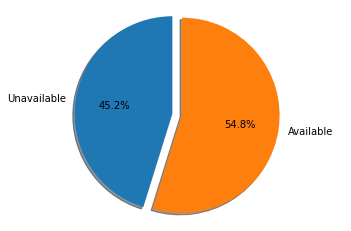

In [19]:
av = len(yt_df[yt_df["reason"]=="Unavailable"])
unav = len(yt_df[yt_df["reason"]=="Parsed"])
labels = 'Unavailable', 'Available'
sizes = [av, unav]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

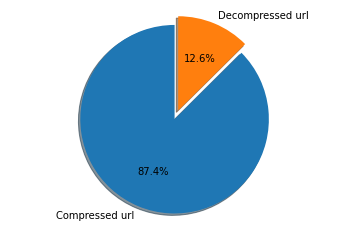

In [20]:
comp = len(yt_df[yt_df["type"]=="compressed"])
decomp = len(yt_df[yt_df["type"]=="decompressed"])

labels = 'Compressed url', 'Decompressed url'
sizes = [comp, decomp]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

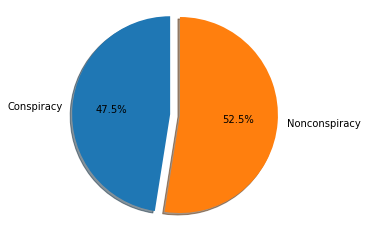

In [115]:
yt = yt_df[yt_df["conspiracy"].notna()]
consp = len(yt[yt["conspiracy"]==True])
noconsp = len(yt[yt["conspiracy"]==False])

labels = 'Conspiracy', 'Nonconspiracy'
sizes = [consp, noconsp]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

#### Good
<a id="good_yt"/>

In [21]:
# df_urls = df_good_activity.loc[df_good_activity['urls'] != '[]']
# val = [x.split()[3].translate({ord("'"): None}).replace(",","") for x in df_urls["urls"]]
# val = [x if ("https://youtu.be" in x) or ("https://www.youtube.com" in x) else np.nan for x in val]
# df_urls["urls"] = val
# df_urls = df_urls[["user_screen_name", "urls"]]
# df_urls = df_urls[df_urls["urls"].notna()]
# df_urls.rename(columns={'urls': 'URL', "user_screen_name": "NAME"}, inplace=True)
# df_urls.to_csv(path_csv[0] + "good_dozen_yt_urls.csv", line_terminator="\n", 
#               encoding="utf-8", index=False)

In [6]:
path_urls = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/urls/")
yt_df = pd.read_csv(path_urls[0] + "yt_good_parsed.csv", lineterminator="\n")
df_urls = df_good_activity.loc[df_good_activity['urls'] != '[]']
val = [x.split()[3].translate({ord("'"): None}).replace(",","") for x in df_urls["urls"]]
val = [x if ("https://youtu.be" in x) or ("https://www.youtube.com" in x) else np.nan for x in val]
df_urls["urls"] = val
df_urls = df_urls[["retweet_count", "urls"]]
df_urls = df_urls[df_urls["urls"].notna()]
merge = yt_df.merge(df_urls, left_on="url", right_on="urls", how="left")
merge.sort_values(by=["retweet_count"], ascending=False)

,user_name,title,description,url,type,available,reason,retweet_count,urls
813,Ryan_Mac_Phd,How to person woman man camera tv,NaN,https://youtu.be/j8oaaP68i4s,compressed,True,Parsed,35309.0,https://youtu.be/j8oaaP68i4s
272,DrJayVarma,Hasan Hears Hot Takes From The Audience | Deep...,"On the latest Deep Cuts, Hasan hears some hot ...",https://youtu.be/sYShB-DzYO8,compressed,True,Parsed,25286.0,https://youtu.be/sYShB-DzYO8
861,VirusesImmunity,mRNA ワクチンの有効性と安全性,mRNAワクチンとは何でしょうか？新型コロナに有効なのでしょうか？安全でしょうか？どのような...,https://youtu.be/uv9lVaxA8NY,compressed,True,Parsed,7406.0,https://youtu.be/uv9lVaxA8NY
565,ChristoPhraser,This Tortoise Could Save a Life - Ft. Alan Ric...,"By watching this, you have donated to Save the...",https://www.youtube.com/watch?v=HkiMz-e2ZcE&fe...,decompressed,True,Parsed,2742.0,https://www.youtube.com/watch?v=HkiMz-e2ZcE&fe...
187,Bob_Wachter,Homer Simpson Conducts Conan’s TBS Exit Interv...,Conan has one last order of business before he...,https://youtu.be/gFfgrPm7-KY,compressed,True,Parsed,1892.0,https://youtu.be/gFfgrPm7-KY
...,...,...,...,...,...,...,...,...,...
958,CarlosdelRio7,VACUNATE POR TODOS - vacunas contra el COVID-1...,HITN presenta “Vacúnate por Todos”; un program...,https://youtu.be/z6pmWYk2CcA,compressed,True,Parsed,0.0,https://youtu.be/z6pmWYk2CcA
514,RELenski,Dean Martin - That's Amore,Dean Martin on Google Play: https://play.googl...,https://www.youtube.com/watch?v=OnFlx2Lnr9Q,decompressed,True,Parsed,0.0,https://www.youtube.com/watch?v=OnFlx2Lnr9Q
517,RELenski,"What's Up, Doc? (1972) - Howard's Send-Off Sce...","What's Up, Doc? movie clips: http://j.mp/1zhof...",https://www.youtube.com/watch?v=dR0_tMYKwXE,decompressed,True,Parsed,0.0,https://www.youtube.com/watch?v=dR0_tMYKwXE
518,RELenski,"Graham: Trump a 'race-baiting, xenophobic reli...",Sen. Lindsey Graham had harsh words for fellow...,https://www.youtube.com/watch?v=2bkDykGhM8c,decompressed,True,Parsed,0.0,https://www.youtube.com/watch?v=2bkDykGhM8c


In [8]:
merge["retweet_count"].sum()

101613.0

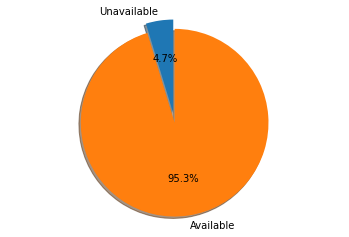

In [24]:
av = len(yt_df[yt_df["reason"]=="Unavailable"])
unav = len(yt_df[yt_df["reason"]=="Parsed"])
labels = 'Unavailable', 'Available'
sizes = [av, unav]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

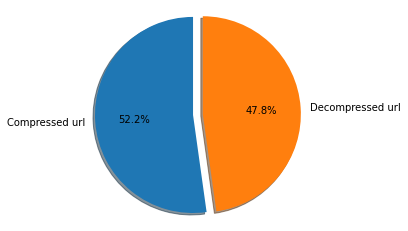

In [25]:
comp = len(yt_df[yt_df["type"]=="compressed"])
decomp = len(yt_df[yt_df["type"]=="decompressed"])

labels = 'Compressed url', 'Decompressed url'
sizes = [comp, decomp]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

#### Rt Bad

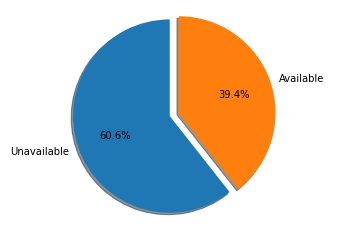

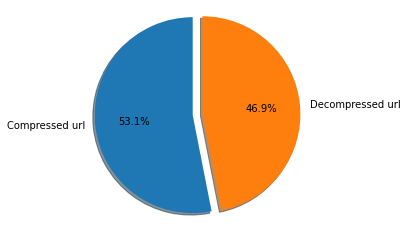

In [47]:
path_urls = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/urls/")
yt_df = pd.read_csv(path_urls[0] + "yt_bad_rt_parsed.csv", lineterminator="\n")
av = len(yt_df[yt_df["reason"]=="Unavailable"])
unav = len(yt_df[yt_df["reason"]=="Parsed"])
labels = 'Unavailable', 'Available'
sizes = [av, unav]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()
comp = len(yt_df[yt_df["type"]=="compressed"])
decomp = len(yt_df[yt_df["type"]=="decompressed"])

labels = 'Compressed url', 'Decompressed url'
sizes = [comp, decomp]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

#### Rt Good

In [ ]:
path_urls = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/urls/")
yt_df = pd.read_csv(path_urls[0] + "yt_bad_rt_parsed.csv", lineterminator="\n")
av = len(yt_df[yt_df["reason"]=="Unavailable"])
unav = len(yt_df[yt_df["reason"]=="Parsed"])
labels = 'Unavailable', 'Available'
sizes = [av, unav]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()
comp = len(yt_df[yt_df["type"]=="compressed"])
decomp = len(yt_df[yt_df["type"]=="decompressed"])

labels = 'Compressed url', 'Decompressed url'
sizes = [comp, decomp]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

#### SAGE on YouTube
<a id="sage_yt"/>

In [31]:
sage_description = pd.read_csv("F:/Supsi/COVID-19-Tweets/large_files/sage_data/yt_description_sage.csv",
                              lineterminator="\n", low_memory=False)
sage_description

,source,word,sage,file_count,file_rate,base_count,base_rate
0,.\data\bad_yt_descriptions.txt,amend,1.952158,27,0.001510,27,0.000323
1,.\data\bad_yt_descriptions.txt,dore,1.947712,25,0.001398,25,0.000299
2,.\data\bad_yt_descriptions.txt,fox,1.912785,56,0.003131,60,0.000718
3,.\data\bad_yt_descriptions.txt,cable,1.907644,15,0.000839,15,0.000180
4,.\data\bad_yt_descriptions.txt,fnc,1.907644,15,0.000839,15,0.000180
5,.\data\bad_yt_descriptions.txt,valuetainment,1.882488,12,0.000671,12,0.000144
6,.\data\bad_yt_descriptions.txt,awakening,1.882488,12,0.000671,12,0.000144
7,.\data\bad_yt_descriptions.txt,sears,1.882488,12,0.000671,12,0.000144
8,.\data\bad_yt_descriptions.txt,nrule,1.882488,12,0.000671,12,0.000144
9,.\data\bad_yt_descriptions.txt,censorship,1.882488,12,0.000671,12,0.000144


In [32]:
sage_title = pd.read_csv("F:/Supsi/COVID-19-Tweets/large_files/sage_data/yt_title_sage.csv",
                              lineterminator="\n", low_memory=False)
sage_title

,source,word,sage,file_count,file_rate,base_count,base_rate
0,.\data\bad_yt_titles.txt,right,1.910087,7,0.005132,8,0.001056
1,.\data\bad_yt_titles.txt,told,1.872861,4,0.002933,4,0.000528
2,.\data\bad_yt_titles.txt,byron,1.872861,4,0.002933,4,0.000528
3,.\data\bad_yt_titles.txt,reparations,1.872861,4,0.002933,4,0.000528
4,.\data\bad_yt_titles.txt,truth,1.857430,6,0.004399,7,0.000924
5,.\data\bad_yt_titles.txt,agenda,1.783770,5,0.003666,6,0.000792
6,.\data\bad_yt_titles.txt,election,1.739247,3,0.002199,3,0.000396
7,.\data\bad_yt_titles.txt,americans,1.739247,3,0.002199,3,0.000396
8,.\data\bad_yt_titles.txt,pleiadian,1.739247,3,0.002199,3,0.000396
9,.\data\bad_yt_titles.txt,heated,1.739247,3,0.002199,3,0.000396


### Facebook
<a id="fb"/>

In [18]:
df_urls = df_bad_activity.loc[df_bad_activity['urls'] != '[]']
val = [x.split()[3].translate({ord("'"): None}).replace(",","") for x in df_urls["urls"]]
val = [x if ("fb.me" in x) else np.nan for x in val]
df_urls["urls"] = val
df_urls = df_urls[["user_screen_name", "urls"]]
df_urls = df_urls[df_urls["urls"].notna()]
df_urls.rename(columns={'urls': 'URL', "user_screen_name": "NAME"}, inplace=True)
# df_urls.to_csv(path_csv[0] + "good_dozen_fbme_urls.csv", line_terminator="\n", 
#               encoding="utf-8", index=False)
df_urls

,NAME,URL
7392,DrButtar,https://fb.me/EPu9rjHn
7393,DrButtar,https://fb.me/1mUr3gt4x
7395,DrButtar,https://fb.me/1eep4j7mN
7396,DrButtar,https://fb.me/Wf6zAxuP
7397,DrButtar,https://fb.me/73oNm7K6U
...,...,...
20181,DrChrisNorthrup,http://fb.me/AYDEWSEs
20182,DrChrisNorthrup,http://fb.me/8EGZtraE3
20183,DrChrisNorthrup,http://fb.me/86C90eEHJ
20184,DrChrisNorthrup,http://fb.me/6zI2rsAzH


# Hashtags
<a id="comp_hashtag"/>

In [37]:
from datetime import date
def get_series(hash_date, name):
    d = hash_date[hash_date["hashtag"]==name]["date"]
    dates_list = []
    for i in list(d):
        x = i.split()[0]
        if not "2" in x:
            x = tweets_utils.process_datetime(i)        
        dates_list.append(datetime.strptime(x, '%Y-%m-%d'))
    serie = pd.Series(dates_list, name=name).value_counts().sort_index()
    return serie

In [38]:
def plot_lines(hashtags, hash_date):
    df = pd.DataFrame()
    x = []
    for i in range(len(hashtags)):
        x.append(get_series(hash_date, hashtags[i]))
    df = pd.concat([i for i in x], axis=1)
    df = df.fillna(0)
    df.sort_index(ascending=True, inplace=True)
    lines = df.plot.line(figsize=(14,6))
    lines.set_xlim([df.first_valid_index(), df.last_valid_index()])

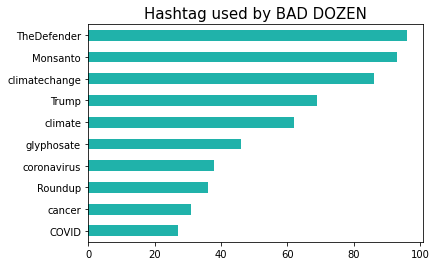

In [39]:
val = pd.Series(tweets_utils.hashtag_process(df_bad_activity))
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='lightseagreen') #red #darkturquoise
ax.set_title('Hashtag used by BAD DOZEN', fontsize=15)
ax.invert_yaxis()
plt.show()

In [40]:
labels = list(val.keys())
values = list(val.values)
df_hs_bd = pd.DataFrame(list(zip(labels, values)), 
                    columns=["Hashtag", "Count"])
df_hs_bd["Dozen"] = ["Bad" for _ in range(len(df_hs_bd))]
df_hs_bd

,Hashtag,Count,Dozen
0,TheDefender,96,Bad
1,Monsanto,93,Bad
2,climatechange,86,Bad
3,Trump,69,Bad
4,climate,62,Bad
...,...,...,...
1328,changeleadership,1,Bad
1329,bisphenol,1,Bad
1330,toxins,1,Bad
1331,junk,1,Bad


In [41]:
labels = list(val[:11].keys())
values = list(val[:11].values)
# for i in range(len(values)):
#     print(str(labels[i]) + "-" + str(values[i]))
labels = ["TheDefender", "Monsanto", "climatechange", "Trump", "COVID19", "climate",
          "glyphosate", "Roundup", "cancer", "plastic"]
values = [96, 93, 86, 69, 65, 62, 46, 36, 31, 26]

In [42]:
dddf = pd.DataFrame(list(zip(labels, values)), 
                    columns=["labels", "values"])
fig = px.treemap(dddf, path=['labels'],values='values', width=800, height=500)
colors = ["#641e16","#78281f","#7b241c","#943126","#922b21",
"#b03a2e","#a93226","#cb4335","#c0392b","#e74c3c",
      "#cd6155","#ec7063","#d98880","#f1948a","#e6b0aa",
          "#f5b7b1", "#f2d7d5","#fadbd8","#f9ebea","#fdedec"]
fig.update_layout(
        font_size=30,
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

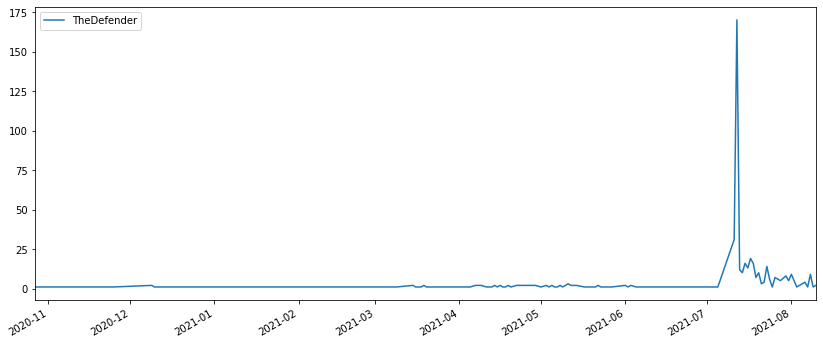

In [43]:
importlib.reload(tweets_utils)
df_bad_hashtags = df_bad_dozen_interactions[["created_at", "hashtags"]]
df_bad_hashtags = df_bad_hashtags[df_bad_hashtags["hashtags"]!="[]"]
hash_date_bad = tweets_utils.hashtag_date(df_bad_hashtags)
hashtags = list(val[:1].index)
plot_lines(hashtags, hash_date_bad)

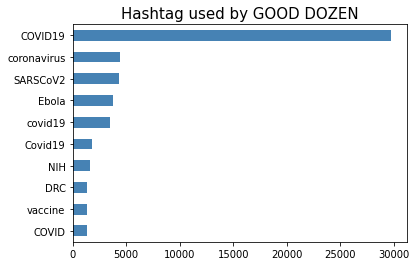

In [44]:
val = pd.Series(tweets_utils.hashtag_process(df_good_activity))
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='steelblue') #red #darkturquoise
ax.set_title('Hashtag used by GOOD DOZEN', fontsize=15)
ax.invert_yaxis()
plt.show()

In [45]:
labels = list(val.keys())
values = list(val.values)
df_hs_gd = pd.DataFrame(list(zip(labels, values)), 
                    columns=["Hashtag", "Count"])
df_hs_gd["Dozen"] = ["Good" for _ in range(len(df_hs_gd))]
df_hs_gd

,Hashtag,Count,Dozen
0,COVID19,29782,Good
1,coronavirus,4417,Good
2,SARSCoV2,4292,Good
3,Ebola,3803,Good
4,covid19,3450,Good
...,...,...,...
28265,apha,1,Good
28266,billionaire,1,Good
28267,OnionGOOMF,1,Good
28268,vizmarathon,1,Good


In [46]:
merged_hs_bd = df_hs_gd.merge(df_hs_bd, left_on="Hashtag", right_on="Hashtag", how="right")
merged_hs_gd = df_hs_gd.merge(df_hs_bd, left_on="Hashtag", right_on="Hashtag", how="left")

In [48]:
x = merged_hs_bd[:10]
x['Count_x'] = x['Count_x'].fillna(0)
x['Dozen_x'] = x['Dozen_x'].fillna("Good")
lst_hs_1 = list(x["Hashtag"])
lst_hs_1.extend(list(x["Hashtag"]))
dozen = list(x["Dozen_y"])
dozen.extend(list(x["Dozen_x"]))
value = list(x["Count_y"])
value.extend(list(x["Count_x"]))
sorting = [10,9,8,7,6,5,4,3,2,1,
           1,1,1,1,1,1,1,1,1,1]
df_hs_final = pd.DataFrame(list(zip(lst_hs_1, dozen, value, sorting)), columns=["Hashtag", "Dozen", "Count", "Order"])
fig = px.bar(df_hs_final, color_discrete_sequence=['red', "blue"], x="Count", y="Hashtag", color="Dozen",
             barmode='group', title="Top 10 Bad Dozen hashtag shared (with comparison)")
fig.update_layout(
    font_size = 15,
    yaxis = dict(autorange="reversed")
)
fig.show()

In [39]:
x

,Hashtag,Count_x,Dozen_x,Count_y,Dozen_y
0,TheDefender,0.0,Good,96,Bad
1,Monsanto,0.0,Good,93,Bad
2,climatechange,94.0,Good,86,Bad
3,Trump,128.0,Good,69,Bad
4,climate,53.0,Good,62,Bad
5,glyphosate,1.0,Good,46,Bad
6,coronavirus,4417.0,Good,38,Bad
7,Roundup,0.0,Good,36,Bad
8,cancer,278.0,Good,31,Bad
9,COVID,1309.0,Good,27,Bad


In [50]:
x = merged_hs_gd[:10]
x['Count_y'] = x['Count_y'].fillna(0)
x['Dozen_y'] = x['Dozen_y'].fillna("Bad")
lst_hs_1 = list(x["Hashtag"])
lst_hs_1.extend(list(x["Hashtag"]))
dozen = list(x["Dozen_x"])
dozen.extend(list(x["Dozen_y"]))
value = list(x["Count_x"])
value.extend(list(x["Count_y"]))
sorting = [10,9,8,7,6,5,4,3,2,1,
           1,1,1,1,1,1,1,1,1,1]
df_hs_final = pd.DataFrame(list(zip(lst_hs_1, dozen, value, sorting)), columns=["Hashtag", "Dozen", "Count", "Order"])
fig = px.bar(df_hs_final, color_discrete_sequence=['blue', "red"], x="Count", y="Hashtag", color="Dozen",
             barmode='group')
fig.update_layout(
    font_size = 15,
    yaxis = dict(autorange="reversed")
)
fig.show()

In [41]:
# values = list(val[:10].values)
# labels = list(val[:10].keys())
# # cmap = matplotlib.cm.Blues
# # mini=min(values)
# # maxi=max(values)
# # norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
# # colors = [cmap(norm(value)) for value in values]
# colors = ["#2980b9", "#3498db", "#5499c7" ,"#5dade2" ,"#7fb3d5",
#           "#85c1e9" ,"#a9cce3" ,"#aed6f1" ,"#d4e6f1" ,"#d6eaf8"]
# squarify.plot(sizes=values, alpha=.8, color=colors, label = labels)
# plt.axis('off')
# plt.show()

In [42]:
29782+4417+4292+3450+1831+1309+1139+1058+1031+997

49306

In [51]:
labels = list(val[:19].keys())
values = list(val[:19].values)
# for i in range(len(values)):
#     print(str(labels[i]) + "-" + str(values[i])) 
labels = ["COVID19",  "Ebola", "NIH", "DRC", "vaccine", "COVAX", "HIV", "globalhealth",
"vaccines", "pandemic"]
values = [49306, 3803, 1603, 1359, 1351, 1028, 933, 834, 813, 759]

In [53]:
dddf = pd.DataFrame(list(zip(labels, values)), 
                    columns=["labels", "values"])
fig = px.treemap(dddf, path=['labels'],values='values', width=800, height=500)
colors = ["#145a32", "#186a3b", "#196f3d", "#1d8348", "#1e8449",
         "#239b56", "#229954", "#28b463", "#28b463", "#2ecc71"]
fig.update_layout(
        font_size=30,

    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()


In [44]:
# importlib.reload(tweets_utils)
# df_good_hashtags = df_good_users_interactions[["created_at", "hashtags"]]
# df_good_hashtags= df_good_hashtags[df_good_hashtags["hashtags"]!="[]"]
# hash_date = tweets_utils.hashtag_date(df_good_hashtags)
# hashtags = list(val[:5].index)
# plot_lines(hashtags)

# Dozen Followers RT
<a id="follow"/>

In [ ]:
sage_description = pd.read_csv("F:/Supsi/COVID-19-Tweets/large_files/sage_data/yt_description_sage.csv",
                              lineterminator="\n", low_memory=False)
sage_description

## Domains
<a id="dm"/>

In [46]:
df_good_activity_urls = substitute_compressed_url(good_rt_in)
df_bad_activity_urls = substitute_compressed_url(bad_rt_in, True, bad_fbme)

In [47]:
val = pd.Series(df_good_activity_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[1:11].plot(kind='barh', color='steelblue')
ax.set_title('Most link shared by GOOD DOZEN followers (Twitter exluded)', fontsize=14)
ax.invert_yaxis()
plt.show()

In [48]:
val = pd.Series(df_bad_activity_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[0:10].plot(kind='barh', color='lightseagreen')
ax.set_title('Most link shared by BAD DOZEN followers', fontsize=14)
ax.invert_yaxis()
plt.show()

# Hashtags
<a id="hs"/>

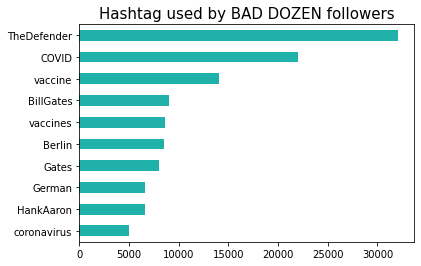

In [15]:
val = pd.Series(tweets_utils.hashtag_process(bad_rt_in))
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='lightseagreen') #red #darkturquoise
ax.set_title('Hashtag used by BAD DOZEN followers', fontsize=15)
ax.invert_yaxis()
plt.show()

In [49]:
# val2 = pd.Series(tweets_utils.hashtag_process(good_rt_in))
# val2 = val.value_counts().sort_values(ascending=False)
# fig = plt.figure()
# ax = val2[:10].plot(kind='barh', color='steelblue') #red #darkturquoise
# ax.set_title('Hashtag used by GOOD DOZEN followers', fontsize=15)
# ax.invert_yaxis()
# plt.show()

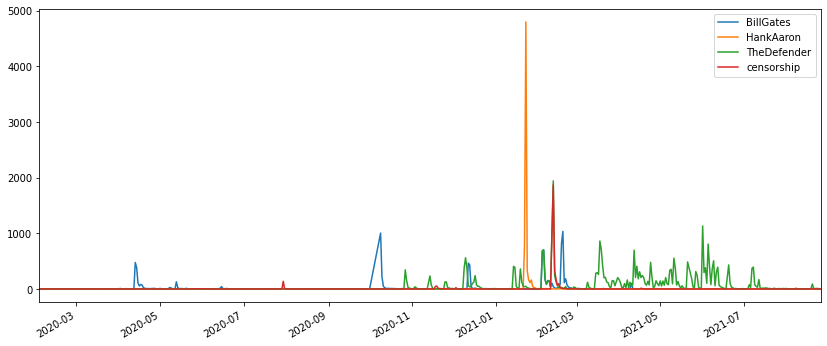

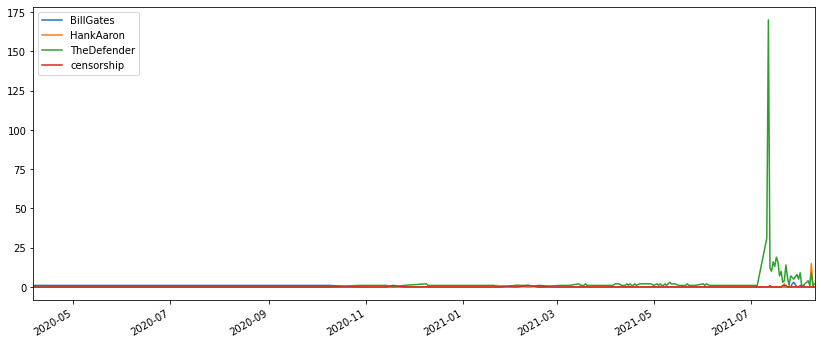

In [105]:
# importlib.reload(tweets_utils)
# df_b_hashtags = bad_rt_in[["created_at", "hashtags"]]
# df_b_hashtags= bad_rt_in[bad_rt_in["hashtags"]!="[]"]
# hash_date_rt_bad = tweets_utils.hashtag_date(df_b_hashtags)
hashtags = ["BillGates", "HankAaron", "TheDefender", "censorship"]
plot_lines(hashtags, hash_date_rt_bad)
plot_lines(hashtags, hash_date_bad)

https://www.mcgill.ca/oss/article/covid-19-health-pseudoscience/anti-vaccine-propaganda-robert-f-kennedy-jr

## Hashtag - SAGE
<a id="hs_sa"/>

In [99]:
hashtag_sage = pd.read_csv("F:/Supsi/COVID-19-Tweets/large_files/sage_data/sage_hs_bad_good_rt.csv", 
            lineterminator="\n", low_memory=False)
hashtag_sage

,source,word,sage,file_count,file_rate,base_count,base_rate
0,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,gates,2.490369,7995,0.026036,7995,0.002684
1,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,hankaaron,2.490327,6577,0.021418,6577,0.002208
2,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,censorship,2.490195,3954,0.012876,3954,0.001327
3,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,thedefender,2.490159,32081,0.104472,32092,0.010772
4,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,monsanto,2.490120,3234,0.010532,3234,0.001086
5,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,gardasil,2.490119,3215,0.010470,3215,0.001079
6,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,bayer,2.489924,2283,0.007435,2283,0.000766
7,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,epa,2.489594,1724,0.005614,1724,0.000579
8,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,censoring,2.489581,1462,0.004761,1462,0.000491
9,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,sharks,2.489568,1450,0.004722,1450,0.000487


# Credibility comparison
<a id="cred_comp"/>

In [8]:
scores = pd.read_csv(path[0] + "sum_of_urls_df_all_months_with_score.csv", low_memory=False, lineterminator="\n")
scores = scores[scores["conspiracy_score"].notna()]
scores = scores[scores["number_of_urls"]>=10]
scores = scores.reset_index(drop=True)

In [9]:
path_rt = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/to_be_scored/")[0]
good_rt = pd.read_csv(path_rt + "good_rt.csv", lineterminator="\n")
bad_rt = pd.read_csv(path_rt + "bad_rt.csv", lineterminator="\n")

In [10]:
title = []
for i in range(len(good_rt["user_screen_name"])):
    title.append("good")
good_rt["dozen"]=title
good_rt
title = []
for i in range(len(bad_rt["user_screen_name"])):
    title.append("bad")
bad_rt["dozen"]=title
bad_rt

,user_screen_name,dozen
0,IFilonczuk,bad
1,ajividen73,bad
2,quingem,bad
3,Sorothavy,bad
4,GiancanaSonny,bad
...,...,...
149222,MorrisJanie,bad
149223,Schypha,bad
149224,chadlipscomb2,bad
149225,Micki82538979,bad


In [11]:
scores_merged_good = scores.merge(good_rt, left_on='user_screen_name', right_on='user_screen_name', how="left")
scores_merged_final = scores_merged_good.merge(bad_rt, left_on='user_screen_name', right_on='user_screen_name', how="left")
scores_merged_final

,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score,dozen_x,dozen_y
0,KeiserOla,12.0,0.0,1.0,9.0,2.0,1.0,NaN,NaN
1,Breinbrouwsels,25.0,0.0,2.0,19.0,4.0,1.0,NaN,NaN
2,PABurch,12.0,0.0,1.0,1.0,10.0,1.0,NaN,NaN
3,CristianeWynnie,12.0,0.0,1.0,11.0,0.0,1.0,NaN,NaN
4,ak2webd3,12.0,0.0,1.0,9.0,2.0,1.0,good,NaN
...,...,...,...,...,...,...,...,...,...
144443,Gus_802,15.0,2.0,0.0,3.0,10.0,0.0,NaN,NaN
144444,FemiJelena,15.0,3.0,0.0,7.0,5.0,0.0,NaN,bad
144445,tunde_adenuga,15.0,3.0,0.0,10.0,2.0,0.0,NaN,NaN
144446,Teensthack,15.0,2.0,0.0,10.0,3.0,0.0,NaN,NaN


In [12]:
lst = []
for i in range(len(scores_merged_final["dozen_x"])):
#     if pd.isna(scores_merged_final["dozen_x"][i]) & (pd.isna(scores_merged_final["dozen_y"][i])):
#         lst.append("common")
    if pd.isna(scores_merged_final["dozen_x"][i]) & (scores_merged_final["dozen_y"][i] == "bad"):
        lst.append("bad")
    elif (scores_merged_final["dozen_x"][i] == "good") & (pd.isna(scores_merged_final["dozen_y"][i])):
        lst.append("good")
#     elif (scores_merged_final["dozen_x"][i] == "good") & (scores_merged_final["dozen_y"][i] == "bad"):
#         lst.append("same")
    else:
        lst.append(np.nan)

In [13]:
scores_dozen = scores
scores_dozen["dozen"]=lst
scores_dozen = scores_dozen[scores_dozen["dozen"].notna()].reset_index(drop=True)
pd.Series(scores_dozen["dozen"]).value_counts().sort_values(ascending=False)

bad     10153
good     7145
Name: dozen, dtype: int64

In [15]:
data_to_plot = [list(scores_dozen[scores_dozen["dozen"]=="common"]["conspiracy_score"]),
                list(scores_dozen[scores_dozen["dozen"]=="bad"]["conspiracy_score"]), 
                list(scores_dozen[scores_dozen["dozen"]=="good"]["conspiracy_score"]),
                list(scores_dozen[scores_dozen["dozen"]=="same"]["conspiracy_score"])]

df = pd.DataFrame(list(zip(data_to_plot[0], data_to_plot[1],data_to_plot[2],data_to_plot[3])), columns=["a","b","c","d"])
# df

In [18]:
bad_score = scores[scores["user_screen_name"].isin(list(bad_rt["user_screen_name"]))]

In [19]:
good_score = scores[scores["user_screen_name"].isin(list(good_rt["user_screen_name"]))]

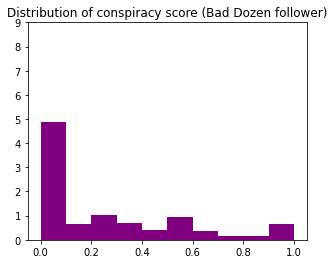

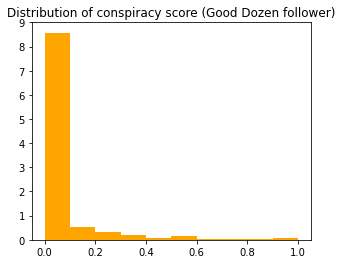

In [92]:
# # Plotting
plt.rcParams["figure.figsize"] = (5,4)

plt.hist(bad_score["conspiracy_score"], 10, color="purple", density=True, stacked=True)
plt.title("Distribution of conspiracy score (Bad Dozen follower)")
plt.ylim([0, 9])
# plt.yscale('log', nonposy='clip')
plt.show()
plt.hist(good_score["conspiracy_score"], 10, color="orange", density=True, stacked=True)
plt.title("Distribution of conspiracy score (Good Dozen follower)")
plt.ylim([0, 9])

# plt.yscale('log', nonposy='clip')
plt.show()

In [92]:
bad_score_recalc = [1-i for i in bad_score["conspiracy_score"]]
bad_score["conspiracy_recalc"] = bad_score_recalc
good_score_recalc = [1-i for i in good_score["conspiracy_score"]]
good_score["conspiracy_recalc"] = good_score_recalc

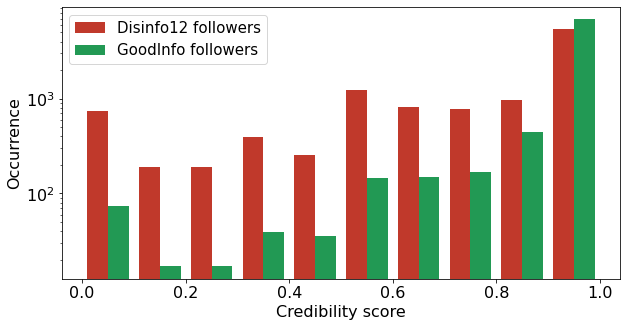

In [95]:
import matplotlib.pylab as pylab

plt.hist([bad_score["conspiracy_recalc"], good_score["conspiracy_recalc"]], color=["#c0392b", "#229954"],
         label=['Disinfo12 followers', 'GoodInfo followers'])
plt.legend(loc='upper right')
# plt.title("Value of conspiracy score (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Credibility score")
plt.ylabel("Occurrence")
plt.rcParams["figure.figsize"] = (10, 5)
params = {'legend.fontsize': 15,
#           'figure.figsize': (15, 5),
         'axes.labelsize': 16,
         'axes.titlesize':'x-large',
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)
plt.legend(loc = "upper left")
plt.savefig('C:/Users/gianl/Desktop/Gi/Supsi/conspiracy_score.png')
plt.show()


# Novax Score
<a id="nova"/>

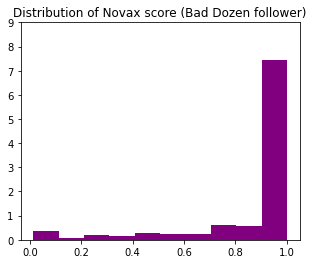

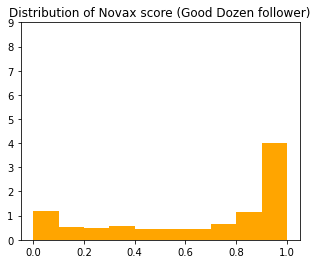

In [94]:
path_score_avaxtar = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/score_avaxtar/")[0]
good_avaxtar = pd.read_csv(path_score_avaxtar + "good_rt_active.csv", lineterminator="\n")
bad_avaxtar = pd.read_csv(path_score_avaxtar + "bad_rt_active.csv", lineterminator="\n")
bad_avaxtar = bad_avaxtar.drop(bad_avaxtar[bad_avaxtar.score == "Error"].index)
good_avaxtar = good_avaxtar.drop(good_avaxtar[good_avaxtar.score == "Error"].index)
bad_avaxtar["score"] = bad_avaxtar["score"].astype("float")
good_avaxtar["score"] = good_avaxtar["score"].astype("float")
# # Plotting
plt.rcParams["figure.figsize"] = (5,4)

plt.hist(bad_avaxtar["score"], 10, color="purple", density=True, stacked=True)
plt.title("Distribution of Novax score (Bad Dozen follower)")
plt.ylim([0, 9])
# plt.yscale('log', nonposy='clip')
plt.show()
plt.hist(good_avaxtar["score"], 10, color="orange", density=True, stacked=True)
plt.title("Distribution of Novax score (Good Dozen follower)")
# plt.yscale('log', nonposy='clip')
plt.ylim([0, 9])

plt.show()

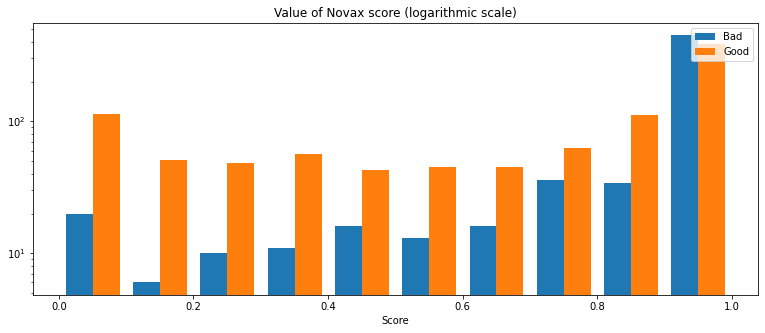

In [96]:
plt.hist([bad_avaxtar["score"], good_avaxtar["score"]], label=['Bad', 'Good'])
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Value of Novax score (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Score")
plt.show()

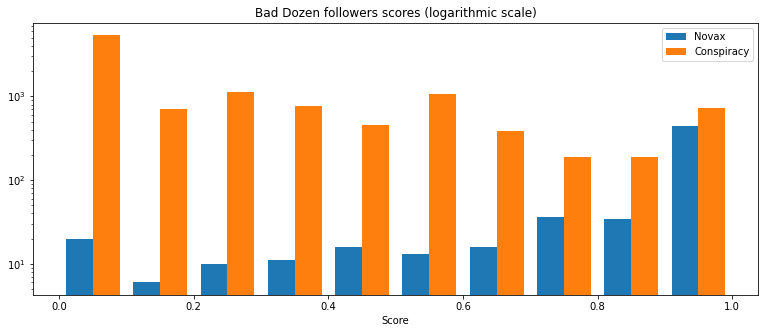

In [97]:
plt.hist([bad_avaxtar["score"], bad_score["conspiracy_score"]], label=['Novax', 'Conspiracy'])
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (14,5)
plt.title("Bad Dozen followers scores (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Score")
plt.show()

In [43]:
lst = ["bad" for i in range(len(bad_avaxtar))]
bad_avaxtar["dozen"] = lst
lst = ["good" for i in range(len(good_avaxtar))]
good_avaxtar["dozen"] = lst
avax_merged = bad_avaxtar.append(good_avaxtar)
fig = px.box(avax_merged, x="score", color="dozen", title="Novax score box plot", 
                            labels={
                            "dozen" : "Kind of user",
                            "conspiracy_score" : "Score from 0 to 1"
                            },
                          color_discrete_sequence=["blue", "red"]
                            )
fig.show()

# Interaction between Good and Bad Dozen
<a id="interaction"/>

In [51]:
df_bad_dozen_interactions[df_bad_dozen_interactions["rt_user_screen_name"].isin(list(good_dozen_list["screen_name"]))]

,id,created_at,user_id,user_screen_name,retweet_count,in_reply_to_user_id,in_reply_to_screen_name,rt_user_id,rt_user_screen_name,hashtags,urls


In [52]:
df_good_dozen_interactions[df_good_dozen_interactions["rt_user_screen_name"].isin(list(bad_dozen_list["screen_name"]))]

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,user_tweets_count,user_friends_count,user_followers_count,...,quoted_status_text,quoted_status_created_at,quoted_user_id,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media


### Interaction between Good Dozen


In [28]:
reply_v = df_good_activity[["user_screen_name", "in_reply_to_screen_name"]]
rp_prova = reply_v[reply_v["in_reply_to_screen_name"].isin(list(good_users_list["screen_name"]))]
rp_prova 

,user_screen_name,in_reply_to_screen_name
9,juliaoftoronto,juliaoftoronto
17,KrutikaKuppalli,alexandraphelan
55,IsabelOtt,IsabelOtt
73,IsabelOtt,IsabelOtt
74,IsabelOtt,IsabelOtt
...,...,...
750756,richardneher,pathogenomenick
750757,richardneher,pathogenomenick
750761,richardneher,EvolveDotZoo
750762,richardneher,arambaut


### Interaction between Bad Dozen


In [29]:
reply = df_bad_activity[["user_screen_name", "in_reply_to_screen_name"]]
reply[reply["in_reply_to_screen_name"].isin(list(bad_dozen_list["screen_name"]))]

,user_screen_name,in_reply_to_screen_name
43,BusyDrT,BusyDrT
90,BusyDrT,BusyDrT
212,mercola,mercola
226,mercola,mercola
231,mercola,mercola
...,...,...
18002,DrChrisNorthrup,BusyDrT
18003,DrChrisNorthrup,BusyDrT
20202,kevdjenkins1,kevdjenkins1
21877,kevdjenkins1,kevdjenkins1


# Reply investigation
<a id="reply_inv"/>

In [30]:
x = reply_v[reply_v["in_reply_to_screen_name"].isin(list(good_users_list["screen_name"]))]

In [31]:
x = x.reset_index(drop=True)
self_rep = []
for i in range(len(x["user_screen_name"])):
    if x["user_screen_name"][i] == x["in_reply_to_screen_name"][i]:
        self_rep.append(x["user_screen_name"][i])

In [32]:
l = x["user_screen_name"].value_counts()

In [33]:
sum(reply_v["user_screen_name"].value_counts())

750820

In [34]:
f = pd.Series(self_rep).value_counts().sort_values(ascending=False)

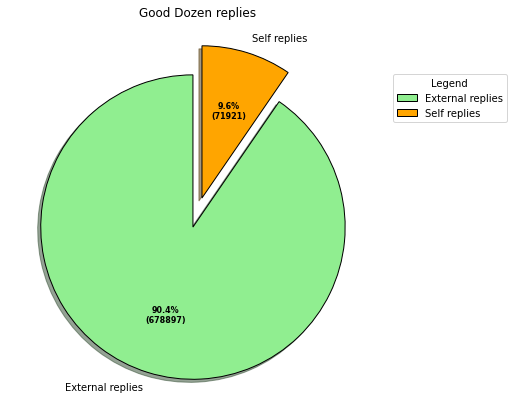

In [35]:
data =[(sum(reply_v["user_screen_name"].value_counts())-sum(f)), sum(f)]
label = ["External replies", "Self replies"]
explode = (0.1, 0.1)
# Creating color parameters
colors = ( "lightgreen", "orange")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp)

# Adding legend
ax.legend(wedges, label,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0.3, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Good Dozen replies")
plt.show()

In [23]:
value = 0
for i in f:
    value = value + i

In [24]:
len_internal_reply =len(reply_v[reply_v["in_reply_to_screen_name"].isin(list(good_dozen_list["screen_name"]))])
len_total_reply = len(reply_v)
print(f"Good dozen internal replies are {round(len_internal_reply/len_total_reply,4)*100}% of total")
print(f"Good dozen self-replies are {round(value/len_total_reply,4)*100}% of total")

Good dozen internal replies are 53.12% of total
Good dozen self-replies are 52.5% of total


### File Botometer
<a id="bom"/>

In [72]:
x1 = pd.read_csv(path[0] + "rt_good.csv")

In [38]:
x2 = pd.read_csv(path[0] + "retweet_users_ccdh.csv", usecols=["user_screen_name"])

In [41]:
same = x2[x2["user_screen_name"].isin(x["user_screen_name"])]

In [60]:
path = "C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/to_be_scored/"

In [61]:
path = glob.glob(path + "/*.csv")

In [65]:
df_bom = pd.DataFrame()
for i in path:
    df_bom = df_bom.append(pd.read_csv(i, usecols=["screen_name"]))
df_bom = df_bom.reset_index(drop = True)
df_bom

,screen_name
0,matomecorona
1,TomthunkitsMind
2,Host24Space
3,CoronaVirusNFO
4,Dooiz1
...,...
99995,TOIDelhi
99996,LauraSmithCrewe
99997,mstewart_23
99998,nickmangwana


In [67]:
df_bom.drop_duplicates(subset ="screen_name", keep = False, inplace = True)
df_bom = df_bom.reset_index(drop = True)

In [75]:
diff = diff.reset_index(drop = True)

In [77]:
df_tbs_good = x[~x["user_screen_name"].isin(df_bom["screen_name"])]
df_tbs_bad = x2[~x2["user_screen_name"].isin(df_bom["screen_name"])]
df_tbs_same = same[~same["user_screen_name"].isin(df["screen_name"])]
df_tbs_good = df_tbs_good.reset_index(drop = True)
df_tbs_bad = df_tbs_bad.reset_index(drop = True)
df_tbs_same = df_tbs_same.reset_index(drop = True)
path_tbs = "C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/to_be_scored/"
df_tbs_good.to_csv(path_tbs + "good_rt.csv", index = False, encoding="utf-8", line_terminator="\n")
df_tbs_bad.to_csv(path_tbs + "bad_rt.csv", index = False, encoding="utf-8", line_terminator="\n")
df_tbs_same.to_csv(path_tbs + "same_rt.csv", index = False, encoding="utf-8", line_terminator="\n")

In [81]:
path_tbs = "C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/to_be_scored/"
df_tbs_good.to_csv(path_tbs + "good_rt.csv", index = False, encoding="utf-8", line_terminator="\n")
df_tbs_bad.to_csv(path_tbs + "bad_rt.csv", index = False, encoding="utf-8", line_terminator="\n")
df_tbs_same.to_csv(path_tbs + "same_rt.csv", index = False, encoding="utf-8", line_terminator="\n")

### Regression: Degree - Score
<a id="degscore"/>

In [89]:
path_degrees = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/large_files/rt_network/degree.json")[0]
path_louvain = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/large_files/rt_network/*louvain*.json")[0]
start_time = time.perf_counter()
file = open (path_degrees)
degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)
start_time = time.perf_counter()
file = open (path_louvain)
louvain = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  88.84981900000002
Time:  26.507505200000196


In [24]:
names = list(scores["user_screen_name"])

In [98]:
nm = []
com = []
for i in louvain:
    nm.append(i)
    com.append(louvain.get(i))


In [99]:
df_louvain = pd.DataFrame(list(zip(nm, com)),
               columns =['name', 'community'])

In [25]:
x = []
y = []
for i in degree:
#     if i[0] in list(scores["user_screen_name"]):
#         x.append(float(scores.loc[scores["user_screen_name"] == i[0]]["conspiracy_score"]))
#         y.append(i[1])
    x.append(i[0])
    y.append(i[1])


In [26]:
df_degree = pd.DataFrame(list(zip(x, y)),
               columns =['name', 'degree'])

In [103]:
df_nodes = df_louvain.merge(df_degree, left_on="name", right_on="name", how="left")

In [106]:
df_merge = scores_dozen.merge(df_nodes, left_on='user_screen_name', right_on='name', how="left")
df_merge

,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score,dozen,name,community,degree
0,KeiserOla,12.0,0.0,1.0,9.0,2.0,1.0,common,KeiserOla,2.0,16.0
1,Breinbrouwsels,25.0,0.0,2.0,19.0,4.0,1.0,common,Breinbrouwsels,2.0,60.0
2,PABurch,12.0,0.0,1.0,1.0,10.0,1.0,common,NaN,NaN,NaN
3,CristianeWynnie,12.0,0.0,1.0,11.0,0.0,1.0,common,CristianeWynnie,32.0,39.0
4,ak2webd3,12.0,0.0,1.0,9.0,2.0,1.0,good,ak2webd3,2.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...
144443,Gus_802,15.0,2.0,0.0,3.0,10.0,0.0,common,Gus_802,1.0,48.0
144444,FemiJelena,15.0,3.0,0.0,7.0,5.0,0.0,bad,FemiJelena,2.0,27.0
144445,tunde_adenuga,15.0,3.0,0.0,10.0,2.0,0.0,common,tunde_adenuga,19.0,33.0
144446,Teensthack,15.0,2.0,0.0,10.0,3.0,0.0,common,Teensthack,6.0,317.0


In [109]:
df_merge_notna = df_merge[df_merge["degree"].notna()].reset_index(drop=True)
df_merge_notna

,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score,dozen,name,community,degree
0,KeiserOla,12.0,0.0,1.0,9.0,2.0,1.0,common,KeiserOla,2.0,16.0
1,Breinbrouwsels,25.0,0.0,2.0,19.0,4.0,1.0,common,Breinbrouwsels,2.0,60.0
2,CristianeWynnie,12.0,0.0,1.0,11.0,0.0,1.0,common,CristianeWynnie,32.0,39.0
3,ak2webd3,12.0,0.0,1.0,9.0,2.0,1.0,good,ak2webd3,2.0,42.0
4,jdmcnamara,12.0,0.0,1.0,11.0,0.0,1.0,common,jdmcnamara,2.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
140390,Gus_802,15.0,2.0,0.0,3.0,10.0,0.0,common,Gus_802,1.0,48.0
140391,FemiJelena,15.0,3.0,0.0,7.0,5.0,0.0,bad,FemiJelena,2.0,27.0
140392,tunde_adenuga,15.0,3.0,0.0,10.0,2.0,0.0,common,tunde_adenuga,19.0,33.0
140393,Teensthack,15.0,2.0,0.0,10.0,3.0,0.0,common,Teensthack,6.0,317.0


In [110]:
df_merge_notna.to_csv(path[0] + "scores_dozen_degree.csv", line_terminator="\n", encoding="utf-8", index=False)

In [111]:
df_merge_notna.corr()

,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score,community,degree
number_of_urls,1.000000,0.714377,0.251868,0.895497,0.379208,0.011560,-0.004711,0.133990
HIGH,0.714377,1.000000,0.139478,0.438953,0.120335,-0.059179,-0.003998,0.172384
LOW,0.251868,0.139478,1.000000,0.145876,0.048372,0.307592,-0.002388,0.028038
UNKW,0.895497,0.438953,0.145876,1.000000,0.115366,0.001570,0.000034,0.076398
SOCIAL,0.379208,0.120335,0.048372,0.115366,1.000000,0.021427,-0.012176,0.060567
conspiracy_score,0.011560,-0.059179,0.307592,0.001570,0.021427,1.000000,-0.004890,-0.014367
community,-0.004711,-0.003998,-0.002388,0.000034,-0.012176,-0.004890,1.000000,-0.005404
degree,0.133990,0.172384,0.028038,0.076398,0.060567,-0.014367,-0.005404,1.000000


<AxesSubplot:>

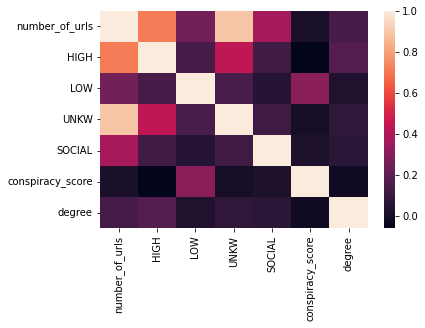

In [32]:
sns.heatmap(df_merge_notna.corr())

## SAGE
<a id="sage"/>

In [102]:
df_sage_txt = pd.read_csv("F:/Supsi/COVID-19-Tweets/large_files/sage_data/sage_txt_bad_good.csv",
                         lineterminator="\n", low_memory=False)
df_sage_txt

,source,word,sage,file_count,file_rate,base_count,base_rate
0,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,thedefender,3.597613,14256,0.008111,14256,0.001779
1,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,zook,3.597349,2965,0.001687,2965,0.000370
2,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,classen,3.597291,2731,0.001554,2731,0.000341
3,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,dressen,3.597017,1723,0.000980,1723,0.000215
4,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,orthostatic,3.596489,1007,0.000573,1007,0.000126
5,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,miller12345,3.596421,956,0.000544,956,0.000119
6,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,enlarged,3.596338,2966,0.001688,2969,0.000370
7,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,aldous,3.595571,1041,0.000592,1042,0.000130
8,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,bitches,3.595376,956,0.000544,957,0.000119
9,F:\Supsi\COVID-19-Tweets\large_files\sage_data...,bicycled,3.594985,462,0.000263,462,0.000058


# Avaxtar
<a id="avaxtar"/>

In [123]:
path_avaxtar = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/score_avaxtar/")[0]
bad_dozen_score = pd.read_csv(path_avaxtar + "bad_dozen.csv", lineterminator="\n", low_memory=False)
good_dozen_score = pd.read_csv(path_avaxtar + "good_users.csv", lineterminator="\n", low_memory=False)

In [124]:
good_dozen_score = good_dozen_score.drop(good_dozen_score[good_dozen_score.score == "Error"].index)
lst_score = []
[lst_score.append(float(i)) for i in good_dozen_score["score"]]
good_dozen_score["score"] = lst_score

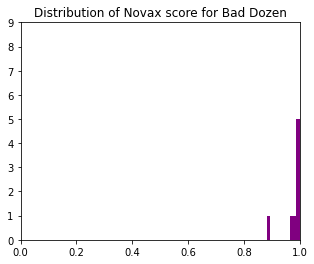

In [125]:
# data = np.array(bad_dozen_score["score"],  dtype=float)
bad_dozen_score = bad_dozen_score.drop(bad_dozen_score[bad_dozen_score.score == "Error"].index)
bad_dozen_score["score"] = bad_dozen_score["score"].astype("float")
# # Plotting
plt.rcParams["figure.figsize"] = (5,4)

plt.hist(bad_dozen_score["score"], 10, color="purple")
plt.title("Distribution of Novax score for Bad Dozen")
plt.xlim([0, 1])
plt.ylim([0, 9])
plt.show()

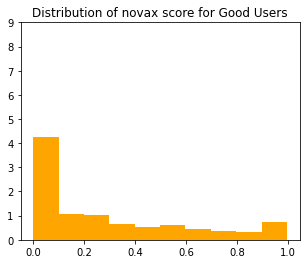

In [126]:
good_dozen_score = good_dozen_score.drop(good_dozen_score[good_dozen_score.score == "Error"].index)
good_dozen_score["score"] = good_dozen_score["score"].astype("float")
plt.hist(good_dozen_score["score"], 10, density=True, color="orange")
plt.title("Distribution of novax score for Good Users")
plt.ylim([0, 9])

plt.show()

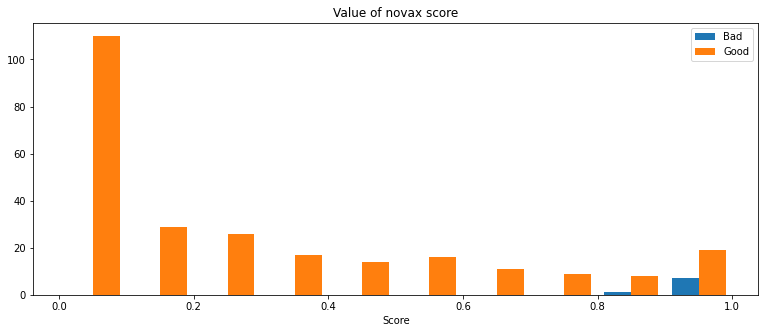

In [133]:
plt.hist([bad_dozen_score["score"], good_dozen_score["score"]], label=['Bad', 'Good'])
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Value of novax score")
# plt.yscale('log', nonposy='clip')
plt.xlabel("Score")
plt.show()